In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 
import tensorflow as tf

In [2]:
tf.config.list_physical_devices("GPU")

2021-10-05 22:23:33.032073: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


[]

In [3]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [4]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


### RNN Outputs and states
- By default, the output of a RNN layer contains a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence. 
- The shape of this output is `(N, units)`.
- A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample)
- If you set `return_sequences=True`. The shape of this output is `(N, timesteps, units)`.


In [7]:
# We will treat image as sequence
n_features = 28
n_steps = 28

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, SimpleRNN, GRU

def createModel(type):
    inputLayer = Input(shape=(n_steps, n_features))

    if (type == 'RNN'):
        layer = SimpleRNN(128, activation='relu')(inputLayer)
    elif (type == 'LSTM'):
       layer = LSTM(128, activation='relu')(inputLayer)
    elif (type == 'GRU'):
        layer = GRU(128, activation='relu')(inputLayer)

    outputLayer = Dense(10, activation='softmax')(layer)
    model = Model(inputs=inputLayer, outputs=outputLayer, name=type)

    return model


In [10]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)
# For somereason if I don't include this, I cannot execute this cell twice for LSTM and GRU
from tensorflow.keras.layers import LSTM, GRU

RNN = createModel('RNN')
LSTM = createModel('LSTM')
GRU = createModel('GRU')

RNN.summary()
LSTM.summary()
GRU.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               20096     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               80384     
_____________________________________________

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

def runModel(model, X, y, **kwargs):

    learning_rate = 0.001
    if 'learning_rate' in kwargs:
        learning_rate = kwargs['learning_rate']

    patience = 10
    if 'patience' in kwargs:
        patience = kwargs['patience']

    epochs=200
    if 'epochs' in kwargs:
        epochs = kwargs['epochs']

    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    earlyStoppingCallback = EarlyStopping(monitor='loss', patience=patience, min_delta=0)

    history = model.fit(X, y, epochs=epochs, verbose=1, callbacks=[earlyStoppingCallback ])

    hist = history.history
    x_arr = np.arange(len(hist['loss'])) + 1
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)
    ax.legend(fontsize=15)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

Epoch 1/100


2021-10-05 17:53:16.583679: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-05 17:53:16.601720: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593440000 Hz


63/63 [==============================] - 2s 17ms/step - loss: 2.1163 - accuracy: 0.1881
Epoch 2/100
63/63 [==============================] - 1s 15ms/step - loss: 1.2485 - accuracy: 0.5501
Epoch 3/100
63/63 [==============================] - 1s 16ms/step - loss: 0.9155 - accuracy: 0.6752
Epoch 4/100
63/63 [==============================] - 1s 22ms/step - loss: 0.6966 - accuracy: 0.7632
Epoch 5/100
63/63 [==============================] - 1s 21ms/step - loss: 0.5114 - accuracy: 0.8321
Epoch 6/100
63/63 [==============================] - 1s 18ms/step - loss: 0.4688 - accuracy: 0.8526
Epoch 7/100
63/63 [==============================] - 1s 19ms/step - loss: 0.4001 - accuracy: 0.8853
Epoch 8/100
63/63 [==============================] - 1s 18ms/step - loss: 0.3628 - accuracy: 0.8949
Epoch 9/100
63/63 [==============================] - 1s 13ms/step - loss: 0.3080 - accuracy: 0.9131
Epoch 10/100
63/63 [==============================] - 1s 13ms/step - loss: 0.2711 - accuracy: 0.9090
Epoch 11/10

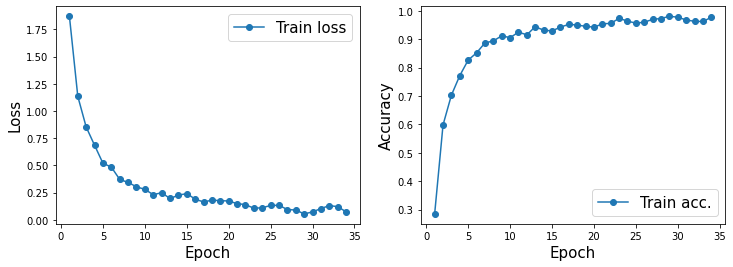

In [11]:
runModel(RNN, X_train, y_train, learning_rate=0.001, epochs=100, patience=5)

Epoch 1/100
63/63 [==============================] - 3s 30ms/step - loss: 2.2337 - accuracy: 0.1940
Epoch 2/100
63/63 [==============================] - 2s 37ms/step - loss: 1.9659 - accuracy: 0.3044
Epoch 3/100
63/63 [==============================] - 2s 30ms/step - loss: 1.6769 - accuracy: 0.4771
Epoch 4/100
63/63 [==============================] - 2s 31ms/step - loss: 1.4211 - accuracy: 0.5386
Epoch 5/100
63/63 [==============================] - 2s 26ms/step - loss: 1.1117 - accuracy: 0.6202
Epoch 6/100
63/63 [==============================] - 2s 39ms/step - loss: 0.8601 - accuracy: 0.7037
Epoch 7/100
63/63 [==============================] - 2s 36ms/step - loss: 0.8341 - accuracy: 0.7185
Epoch 8/100
63/63 [==============================] - 2s 35ms/step - loss: 0.6492 - accuracy: 0.7697
Epoch 9/100
63/63 [==============================] - 2s 33ms/step - loss: 0.5189 - accuracy: 0.8285
Epoch 10/100
63/63 [==============================] - 2s 34ms/step - loss: 0.4405 - accuracy: 0.8545

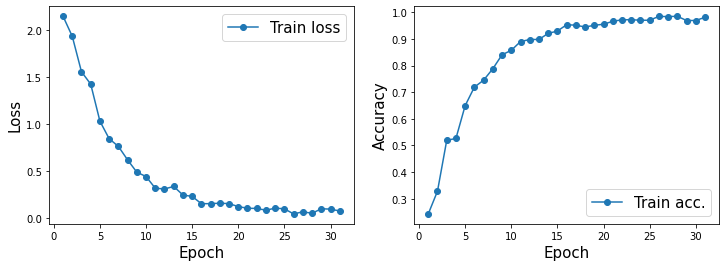

In [12]:
runModel(LSTM, X_train, y_train, learning_rate=0.001, epochs=100, patience=5)

Epoch 1/100
63/63 [==============================] - 3s 37ms/step - loss: 2.2729 - accuracy: 0.1484
Epoch 2/100
63/63 [==============================] - 3s 40ms/step - loss: 1.6552 - accuracy: 0.3947
Epoch 3/100
63/63 [==============================] - 2s 31ms/step - loss: 1.0905 - accuracy: 0.6019
Epoch 4/100
63/63 [==============================] - 2s 34ms/step - loss: 0.7564 - accuracy: 0.7401
Epoch 5/100
63/63 [==============================] - 2s 31ms/step - loss: 0.5711 - accuracy: 0.8006
Epoch 6/100
63/63 [==============================] - 2s 35ms/step - loss: 0.4706 - accuracy: 0.8401
Epoch 7/100
63/63 [==============================] - 3s 41ms/step - loss: 0.4012 - accuracy: 0.8858
Epoch 8/100
63/63 [==============================] - 3s 42ms/step - loss: 0.3482 - accuracy: 0.8847
Epoch 9/100
63/63 [==============================] - 3s 43ms/step - loss: 0.2348 - accuracy: 0.9292
Epoch 10/100
63/63 [==============================] - 3s 40ms/step - loss: 0.1968 - accuracy: 0.9341

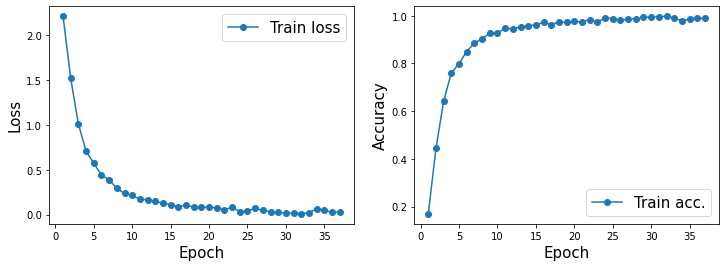

In [13]:
runModel(GRU, X_train, y_train, learning_rate=0.001, epochs=100, patience=5)

In [14]:
test_results = RNN.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

test_results = LSTM.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

test_results = GRU.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

63/63 [==============================] - 1s 5ms/step - loss: 0.4864 - accuracy: 0.8680

Test Acc. 86.80%
63/63 [==============================] - 1s 12ms/step - loss: 0.4566 - accuracy: 0.9070

Test Acc. 90.70%
63/63 [==============================] - 1s 10ms/step - loss: 0.3148 - accuracy: 0.9195

Test Acc. 91.95%


In [15]:
def misClassify(model, X_test, y_test):
    # Find misclassification
    y_pred_tf = model(X_test)
    y_pred_tf.numpy().shape

    y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
    print(y_pred.shape)
    print(y_test.shape)

    loc = y_pred != y_test
    print(f'Missclassification = {loc.sum()}')

    fig, axes2D = plt.subplots(3,5, figsize=(12,8))
    axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
    X_test_miss = X_test[loc]
    y_test_miss = y_test[loc]
    y_pred_miss = y_pred[loc]
    for idx, ax in enumerate(axes):
        ax.imshow(X_test_miss[idx], cmap='gray')
        ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
    fig.tight_layout()
    plt.show()

(2000,)
(2000,)
Missclassification = 264


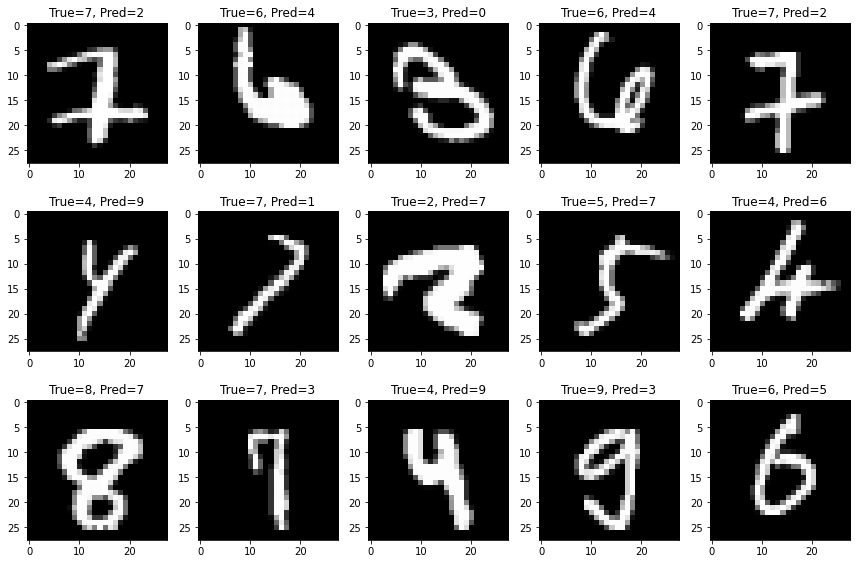

In [16]:
misClassify(RNN, X_test, y_test)

(2000,)
(2000,)
Missclassification = 186


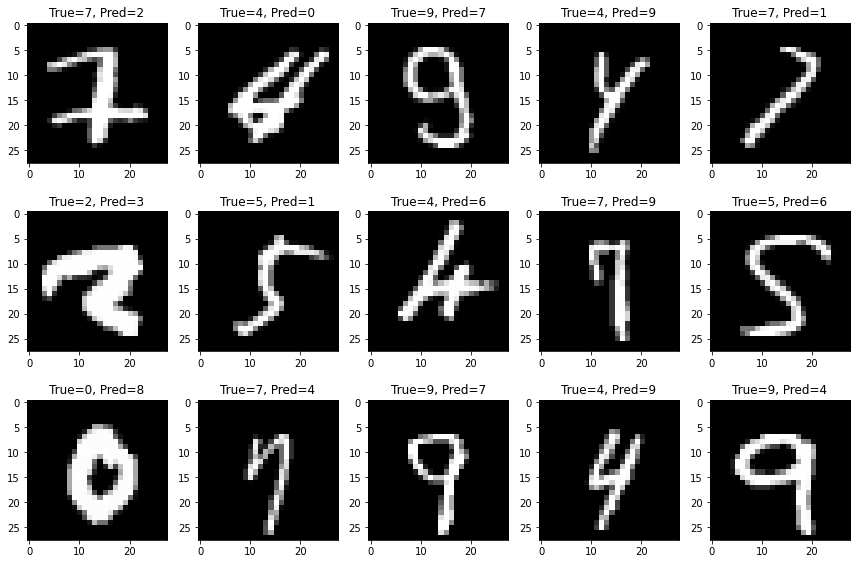

In [17]:
misClassify(LSTM, X_test, y_test)

(2000,)
(2000,)
Missclassification = 161


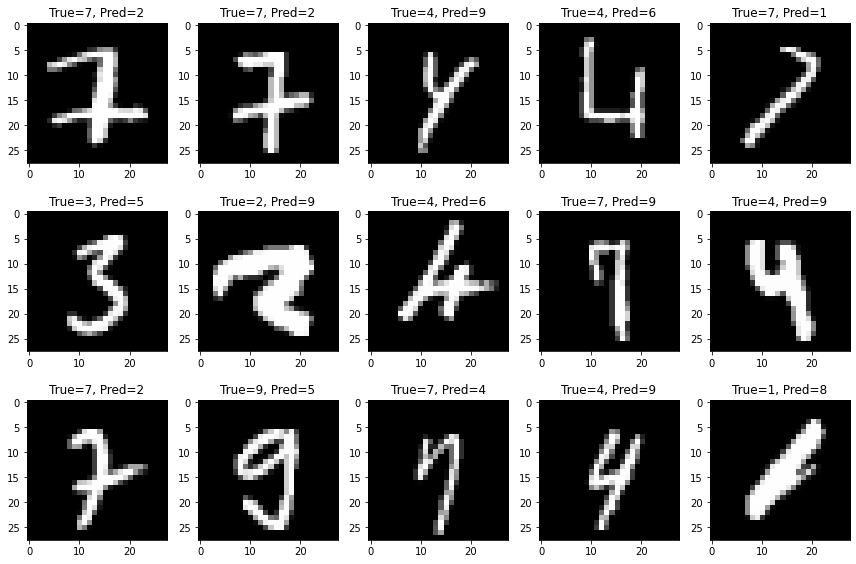

In [18]:
misClassify(GRU, X_test, y_test)